# Lab 15: Random numbers & Monte Carlo Methods

In [9]:
# A few import statements to start
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Set style for better-looking plots
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
np.random.seed(42)  # For reproducibility - can be changed if you want 'random' results

### Activty 1: Examining Random Number Distrobutions

Understanding how random numbers are generated and verifying their distributions is crucial for Monte Carlo methods

Part 1: Run the code cell below to examine uniform distrobution

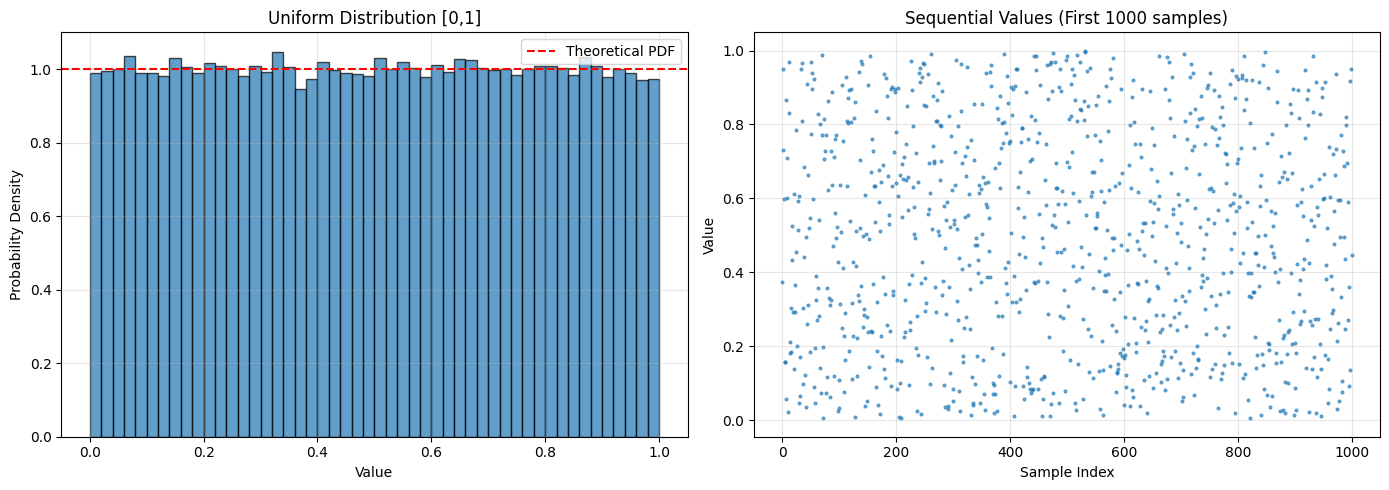

Mean: 0.4995 (Expected: 0.5000)
Std Dev: 0.2883 (Expected: 0.2887)


In [10]:
# Generate uniform random numbers
n_samples = 100000
uniform_samples = np.random.uniform(0, 1, n_samples)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(uniform_samples, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[0].axhline(y=1.0, color='r', linestyle='--', label='Theoretical PDF')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('Uniform Distribution [0,1]')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Sequential plot to show quasi-random behavior
axes[1].plot(uniform_samples[:1000], 'o', markersize=2, alpha=0.6)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Value')
axes[1].set_title('Sequential Values (First 1000 samples)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean: {np.mean(uniform_samples):.4f} (Expected: 0.5000)")
print(f"Std Dev: {np.std(uniform_samples):.4f} (Expected: {1/np.sqrt(12):.4f})")

Part 2: Run the code cell below to examine the gaussian distrobution

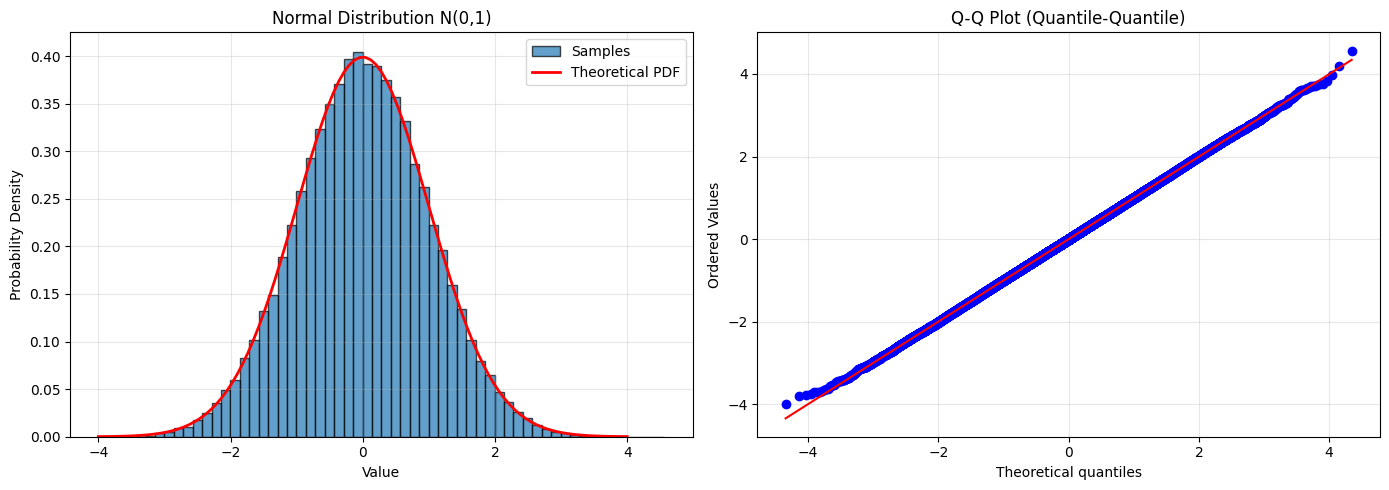

Mean: 0.0026 (Expected: 0.0000)
Std Dev: 0.9983 (Expected: 1.0000)


In [11]:
# Generate normal random numbers
mu, sigma = 0, 1
normal_samples = np.random.normal(mu, sigma, n_samples)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with theoretical PDF
axes[0].hist(normal_samples, bins=60, density=True, alpha=0.7, edgecolor='black', label='Samples')
x = np.linspace(-4, 4, 100)
axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Theoretical PDF')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('Normal Distribution N(0,1)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(normal_samples, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Quantile-Quantile)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean: {np.mean(normal_samples):.4f} (Expected: {mu:.4f})")
print(f"Std Dev: {np.std(normal_samples):.4f} (Expected: {sigma:.4f})")

Part 3: Run the code below to examine other commonly encountered distrobutions

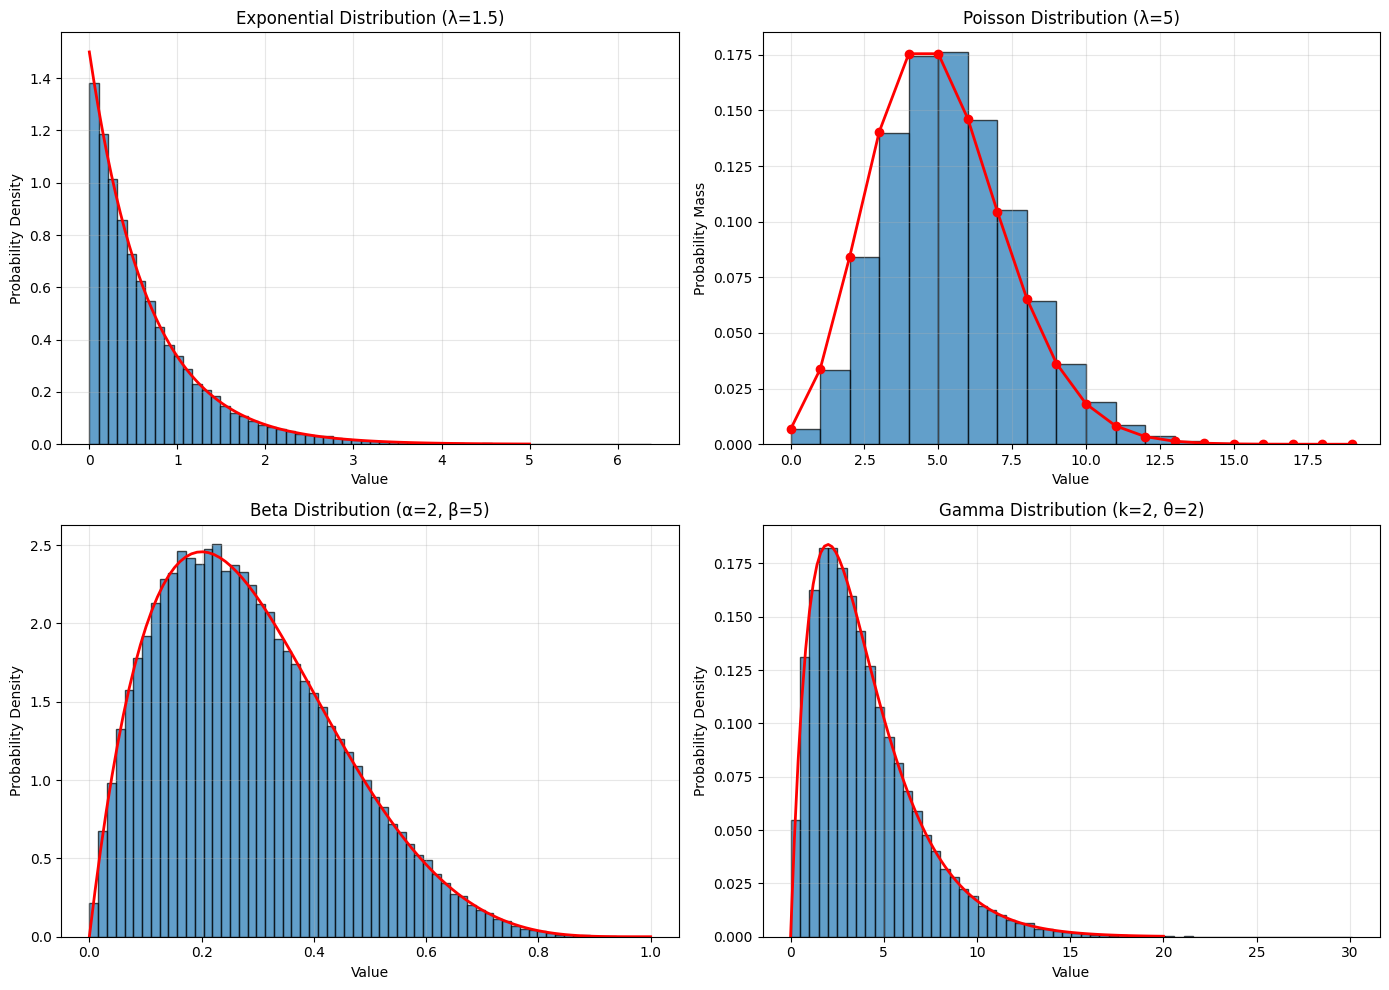

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Exponential distribution
lambda_param = 1.5
exp_samples = np.random.exponential(1/lambda_param, n_samples)
axes[0, 0].hist(exp_samples, bins=60, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(0, 5, 100)
axes[0, 0].plot(x, lambda_param * np.exp(-lambda_param * x), 'r-', linewidth=2)
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].set_title(f'Exponential Distribution (λ={lambda_param})')
axes[0, 0].grid(True, alpha=0.3)

# Poisson distribution
lambda_poisson = 5
poisson_samples = np.random.poisson(lambda_poisson, n_samples)
axes[0, 1].hist(poisson_samples, bins=range(0, 20), density=True, alpha=0.7, edgecolor='black')
x_poisson = np.arange(0, 20)
axes[0, 1].plot(x_poisson, stats.poisson.pmf(x_poisson, lambda_poisson), 'ro-', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Probability Mass')
axes[0, 1].set_title(f'Poisson Distribution (λ={lambda_poisson})')
axes[0, 1].grid(True, alpha=0.3)

# Beta distribution
alpha, beta = 2, 5
beta_samples = np.random.beta(alpha, beta, n_samples)
axes[1, 0].hist(beta_samples, bins=60, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(0, 1, 100)
axes[1, 0].plot(x, stats.beta.pdf(x, alpha, beta), 'r-', linewidth=2)
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Probability Density')
axes[1, 0].set_title(f'Beta Distribution (α={alpha}, β={beta})')
axes[1, 0].grid(True, alpha=0.3)

# Gamma distribution
k, theta = 2, 2
gamma_samples = np.random.gamma(k, theta, n_samples)
axes[1, 1].hist(gamma_samples, bins=60, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(0, 20, 100)
axes[1, 1].plot(x, stats.gamma.pdf(x, k, scale=theta), 'r-', linewidth=2)
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Probability Density')
axes[1, 1].set_title(f'Gamma Distribution (k={k}, θ={theta})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Before moving on to the next activty, take a moment to change some of the values that describe the distrobutions in part 3 (e.g., $\lambda, \alpha, \beta$) and examine the change in the resulting plots. 

### Activity 2: Random Walks

Random walks are commonly encountered in several physics contexts. Here we will examine random walks in 1, 2, and 3 dimensions. 

Part 1: The 1D Random Walk. Examine the code below, and run the cell. 

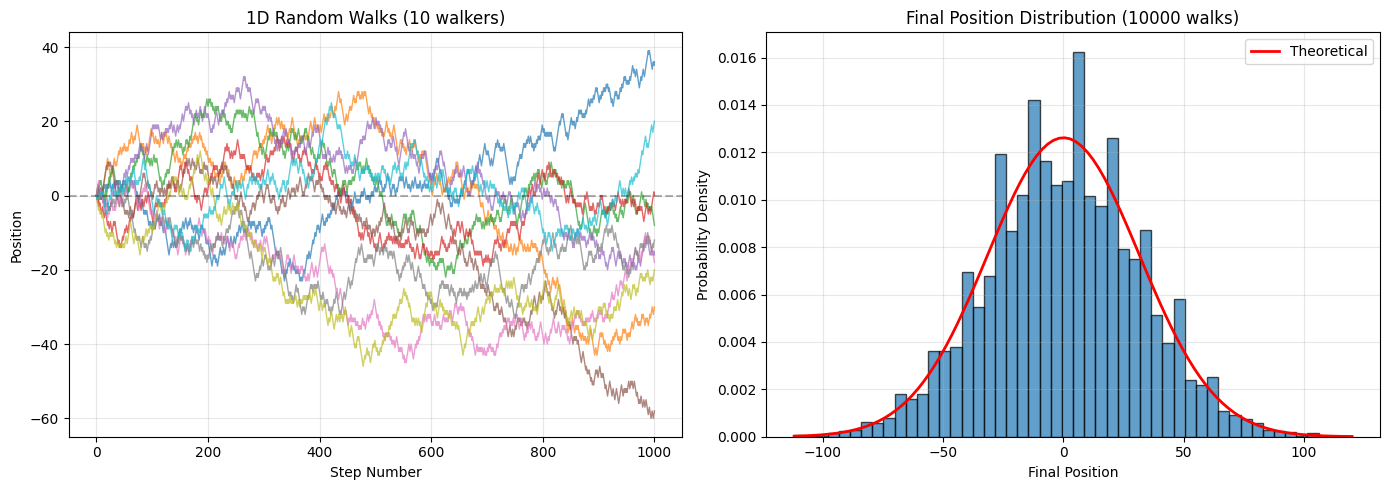

Mean final position: -0.05 (Expected: 0)
Std of final position: 31.73 (Expected: 31.62)


In [13]:
def random_walk_1d(n_steps, n_walks=1):
    """Simulate 1D random walk(s)"""
    steps = np.random.choice([-1, 1], size=(n_walks, n_steps))
    positions = np.cumsum(steps, axis=1)
    # Add initial position (0)
    positions = np.column_stack([np.zeros(n_walks), positions])
    return positions

n_steps = 1000
n_walks = 10

walks_1d = random_walk_1d(n_steps, n_walks)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual walks
for i in range(n_walks):
    axes[0].plot(walks_1d[i], alpha=0.7, linewidth=1)
axes[0].set_xlabel('Step Number')
axes[0].set_ylabel('Position')
axes[0].set_title(f'1D Random Walks ({n_walks} walkers)')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)

# Distribution of final positions
n_walks_large = 10000
walks_large = random_walk_1d(n_steps, n_walks_large)
final_positions = walks_large[:, -1]

axes[1].hist(final_positions, bins=50, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(final_positions.min(), final_positions.max(), 100)
# Theoretical: normal distribution with variance = n_steps
axes[1].plot(x, stats.norm.pdf(x, 0, np.sqrt(n_steps)), 'r-', linewidth=2, label='Theoretical')
axes[1].set_xlabel('Final Position')
axes[1].set_ylabel('Probability Density')
axes[1].set_title(f'Final Position Distribution ({n_walks_large} walks)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean final position: {np.mean(final_positions):.2f} (Expected: 0)")
print(f"Std of final position: {np.std(final_positions):.2f} (Expected: {np.sqrt(n_steps):.2f})")

Try adjusting the number of steps and walkers and rerun. How does this change the result? Does it make sense given what we know about these types of simulations?

Part 2: The 2D Random Walk. Examine the code below, and run the cell. 

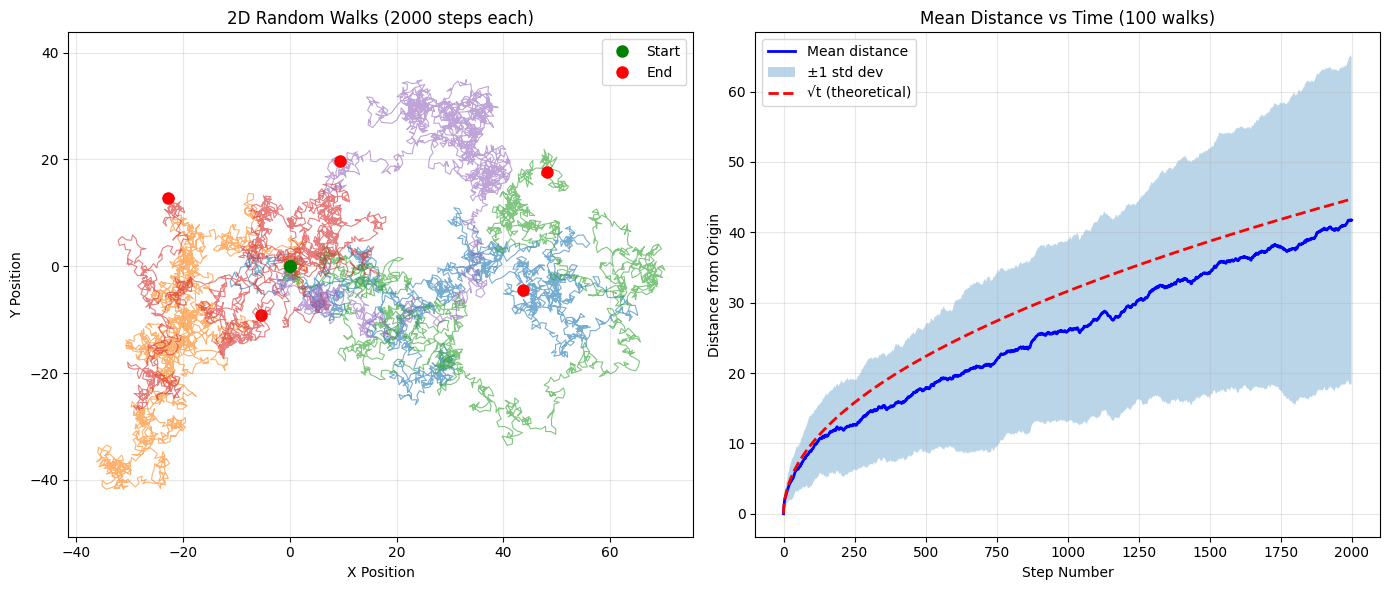

Final mean distance: 41.72
Theoretical expectation: 44.72


In [14]:
def random_walk_2d(n_steps):
    """Simulate a 2D random walk"""
    # Random angles for each step
    angles = np.random.uniform(0, 2*np.pi, n_steps)
    
    # Unit step in each direction
    dx = np.cos(angles)
    dy = np.sin(angles)
    
    # Cumulative sum to get positions
    x = np.cumsum(np.concatenate([[0], dx]))
    y = np.cumsum(np.concatenate([[0], dy]))
    
    return x, y

n_steps = 2000
n_walks = 5

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot multiple walks
for i in range(n_walks):
    x, y = random_walk_2d(n_steps)
    axes[0].plot(x, y, alpha=0.6, linewidth=0.8)
    axes[0].plot(x[0], y[0], 'go', markersize=8, label='Start' if i == 0 else '')
    axes[0].plot(x[-1], y[-1], 'ro', markersize=8, label='End' if i == 0 else '')

axes[0].set_xlabel('X Position')
axes[0].set_ylabel('Y Position')
axes[0].set_title(f'2D Random Walks ({n_steps} steps each)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axis('equal')

# Distance from origin over time
n_walks_dist = 100
distances = np.zeros((n_walks_dist, n_steps + 1))

for i in range(n_walks_dist):
    x, y = random_walk_2d(n_steps)
    distances[i] = np.sqrt(x**2 + y**2)

mean_distance = np.mean(distances, axis=0)
std_distance = np.std(distances, axis=0)

steps = np.arange(n_steps + 1)
axes[1].plot(steps, mean_distance, 'b-', linewidth=2, label='Mean distance')
axes[1].fill_between(steps, mean_distance - std_distance, mean_distance + std_distance, 
                       alpha=0.3, label='±1 std dev')
axes[1].plot(steps, np.sqrt(steps), 'r--', linewidth=2, label='√t (theoretical)')
axes[1].set_xlabel('Step Number')
axes[1].set_ylabel('Distance from Origin')
axes[1].set_title(f'Mean Distance vs Time ({n_walks_dist} walks)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final mean distance: {mean_distance[-1]:.2f}")
print(f"Theoretical expectation: {np.sqrt(n_steps):.2f}")

Try adjusting the number of steps and walkers and rerun. How does this change the result? Does it make sense given what we know about these types of simulations?

Part 3: The 3D Random Walk. Examine the code below, and run the cell. 

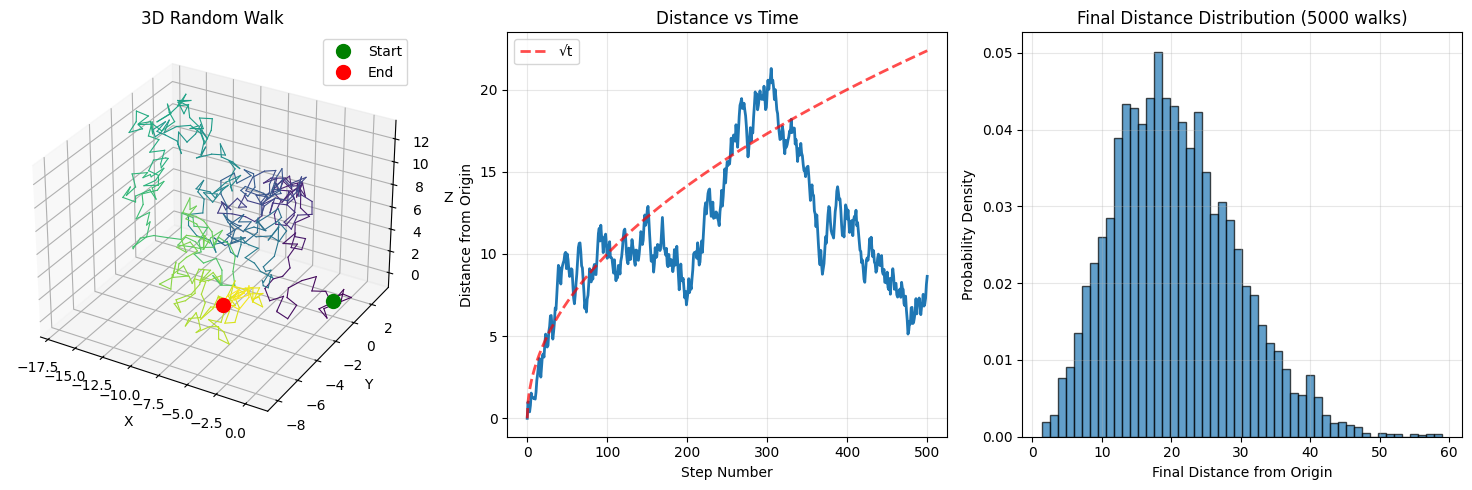

Mean final distance: 20.65
Std of final distance: 8.73


In [15]:
def random_walk_3d(n_steps):
    """Simulate a 3D random walk"""
    # Random direction on unit sphere using spherical coordinates
    theta = np.random.uniform(0, 2*np.pi, n_steps)  # azimuthal angle
    phi = np.arccos(np.random.uniform(-1, 1, n_steps))  # polar angle
    
    # Unit step in each direction
    dx = np.sin(phi) * np.cos(theta)
    dy = np.sin(phi) * np.sin(theta)
    dz = np.cos(phi)
    
    # Cumulative sum to get positions
    x = np.cumsum(np.concatenate([[0], dx]))
    y = np.cumsum(np.concatenate([[0], dy]))
    z = np.cumsum(np.concatenate([[0], dz]))
    
    return x, y, z

n_steps = 500

fig = plt.figure(figsize=(15, 5))

# 3D trajectory
ax1 = fig.add_subplot(131, projection='3d')
x, y, z = random_walk_3d(n_steps)

# Color by time
colors = plt.cm.viridis(np.linspace(0, 1, len(x)))
for i in range(len(x)-1):
    ax1.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=colors[i], linewidth=0.8)

ax1.plot([x[0]], [y[0]], [z[0]], 'go', markersize=10, label='Start')
ax1.plot([x[-1]], [y[-1]], [z[-1]], 'ro', markersize=10, label='End')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Random Walk')
ax1.legend()

# Distance from origin
ax2 = fig.add_subplot(132)
distances_3d = np.sqrt(x**2 + y**2 + z**2)
ax2.plot(distances_3d, linewidth=2)
ax2.plot(np.sqrt(np.arange(len(distances_3d))), 'r--', linewidth=2, alpha=0.7, label='√t')
ax2.set_xlabel('Step Number')
ax2.set_ylabel('Distance from Origin')
ax2.set_title('Distance vs Time')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Distribution of final positions (many walks)
ax3 = fig.add_subplot(133)
n_walks = 5000
final_distances = []

for _ in range(n_walks):
    x, y, z = random_walk_3d(n_steps)
    final_distances.append(np.sqrt(x[-1]**2 + y[-1]**2 + z[-1]**2))

ax3.hist(final_distances, bins=50, density=True, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Final Distance from Origin')
ax3.set_ylabel('Probability Density')
ax3.set_title(f'Final Distance Distribution ({n_walks} walks)')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean final distance: {np.mean(final_distances):.2f}")
print(f"Std of final distance: {np.std(final_distances):.2f}")

Try adjusting the number of steps and rerun (e.g., 1000, 5000, 10000, etc.). How does this change the result? Note that this simulation is unlike the prior two cases because we only consider a single walker. But with each subsequent run, it is like a 'new' walker each time!

### Activity 3: Markov Chain Monte Carlo (MCMC) - Metropolis-Hastings Algorithm

Run the cell below to examine sampling with a complex posterior distribution.

C:\Users\Joseph\AppData\Local\Temp\ipykernel_37808\1626589612.py:70: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  target_vals = target_vals / np.trapz(target_vals, x_plot)  # Normalize


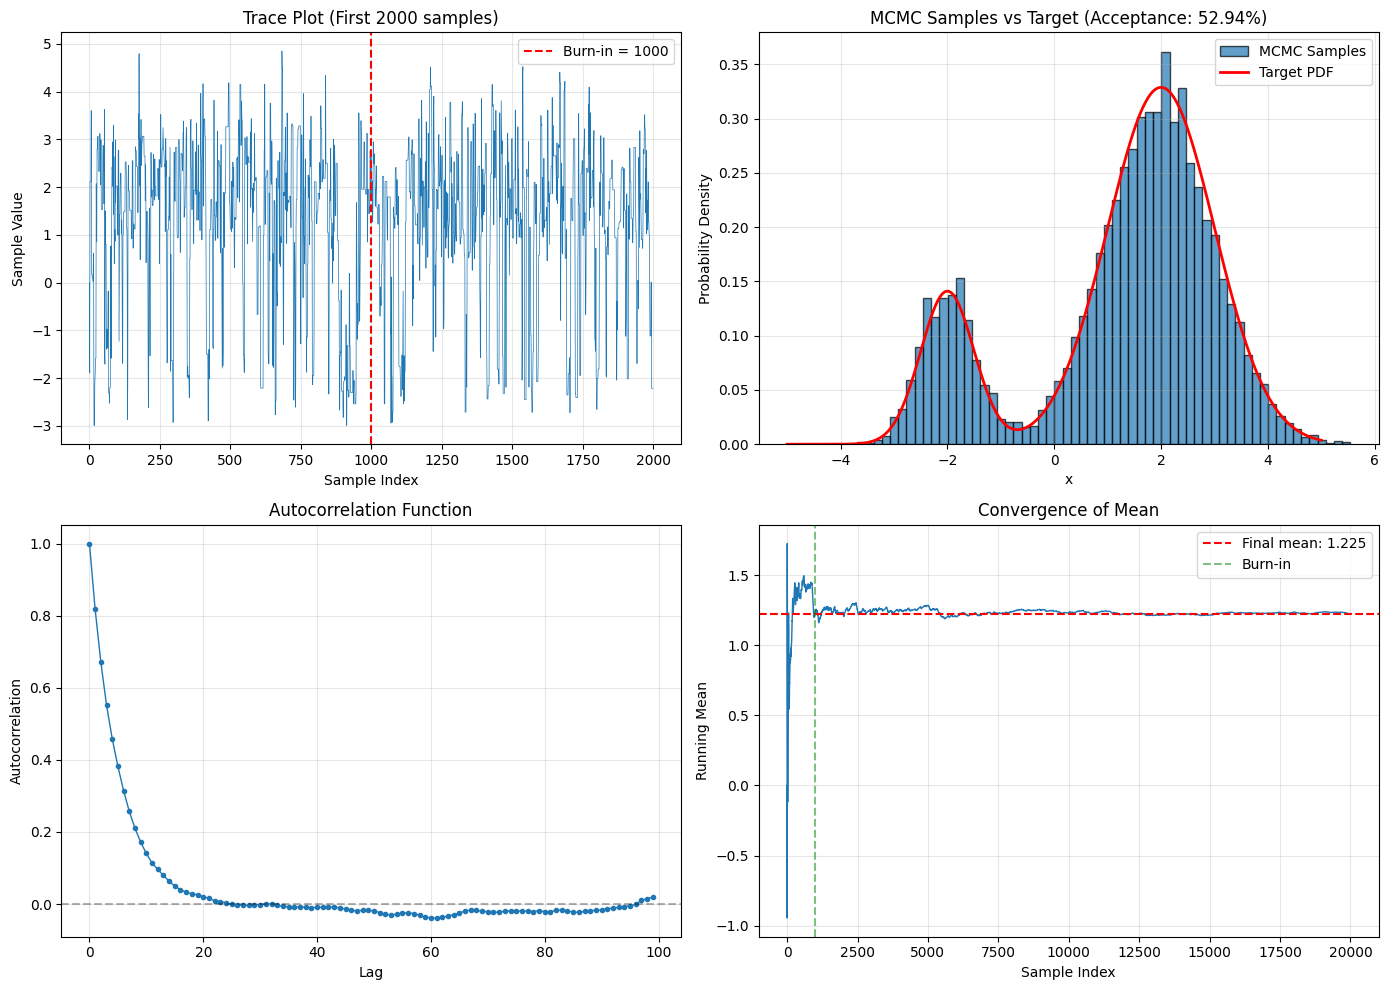

Acceptance rate: 52.94%
Mean of samples: 1.2251
Std of samples: 1.8146


In [16]:
def metropolis_hastings(target_pdf, initial, n_samples, proposal_std=1.0):
    """
    Metropolis-Hastings MCMC algorithm
    
    Parameters:
    -----------
    target_pdf : function
        Target probability density function (unnormalized is OK)
    initial : float
        Initial value
    n_samples : int
        Number of samples to generate
    proposal_std : float
        Standard deviation of proposal distribution (Gaussian random walk)
    """
    samples = np.zeros(n_samples)
    samples[0] = initial
    
    current = initial
    current_pdf = target_pdf(current)
    
    n_accepted = 0
    
    for i in range(1, n_samples):
        # Propose new state
        proposed = current + np.random.normal(0, proposal_std)
        proposed_pdf = target_pdf(proposed)
        
        # Acceptance probability
        acceptance_prob = min(1, proposed_pdf / current_pdf)
        
        # Accept or reject
        if np.random.random() < acceptance_prob:
            current = proposed
            current_pdf = proposed_pdf
            n_accepted += 1
        
        samples[i] = current
    
    acceptance_rate = n_accepted / n_samples
    return samples, acceptance_rate

# Example: Sample from a mixture of Gaussians 
def target_distribution(x):
    return 0.3 * np.exp(-0.5 * ((x + 2) / 0.5)**2) + \
           0.7 * np.exp(-0.5 * ((x - 2) / 1.0)**2)

n_samples = 20000
initial = 0.0
samples, acceptance_rate = metropolis_hastings(target_distribution, initial, n_samples, proposal_std=2.0)

# Discard burn-in
burn_in = 1000
samples_burned = samples[burn_in:]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Trace plot
axes[0, 0].plot(samples[:2000], linewidth=0.5)
axes[0, 0].axvline(x=burn_in, color='r', linestyle='--', label=f'Burn-in = {burn_in}')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Sample Value')
axes[0, 0].set_title('Trace Plot (First 2000 samples)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Histogram with target
x_plot = np.linspace(-5, 5, 1000)
target_vals = np.array([target_distribution(x) for x in x_plot])
target_vals = target_vals / np.trapz(target_vals, x_plot)  # Normalize

axes[0, 1].hist(samples_burned, bins=60, density=True, alpha=0.7, edgecolor='black', label='MCMC Samples')
axes[0, 1].plot(x_plot, target_vals, 'r-', linewidth=2, label='Target PDF')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].set_title(f'MCMC Samples vs Target (Acceptance: {acceptance_rate:.2%})')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Autocorrelation
from numpy import correlate
def autocorr(x, max_lag=100):
    x = x - np.mean(x)
    result = np.array([1] + [np.corrcoef(x[:-i], x[i:])[0,1] for i in range(1, max_lag)])
    return result

acf = autocorr(samples_burned, max_lag=100)
axes[1, 0].plot(acf, 'o-', markersize=3, linewidth=1)
axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('Autocorrelation')
axes[1, 0].set_title('Autocorrelation Function')
axes[1, 0].grid(True, alpha=0.3)

# Running mean
running_mean = np.cumsum(samples) / np.arange(1, len(samples) + 1)
axes[1, 1].plot(running_mean, linewidth=1)
axes[1, 1].axhline(y=np.mean(samples_burned), color='r', linestyle='--', 
                   label=f'Final mean: {np.mean(samples_burned):.3f}')
axes[1, 1].axvline(x=burn_in, color='g', linestyle='--', alpha=0.5, label='Burn-in')
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Running Mean')
axes[1, 1].set_title('Convergence of Mean')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Acceptance rate: {acceptance_rate:.2%}")
print(f"Mean of samples: {np.mean(samples_burned):.4f}")
print(f"Std of samples: {np.std(samples_burned):.4f}")

Note we are able to match well with the target probability distrobution using this algorithm

Now we'll turn to another example use MCMC to estimate parameters of a simple linear model given noisy data

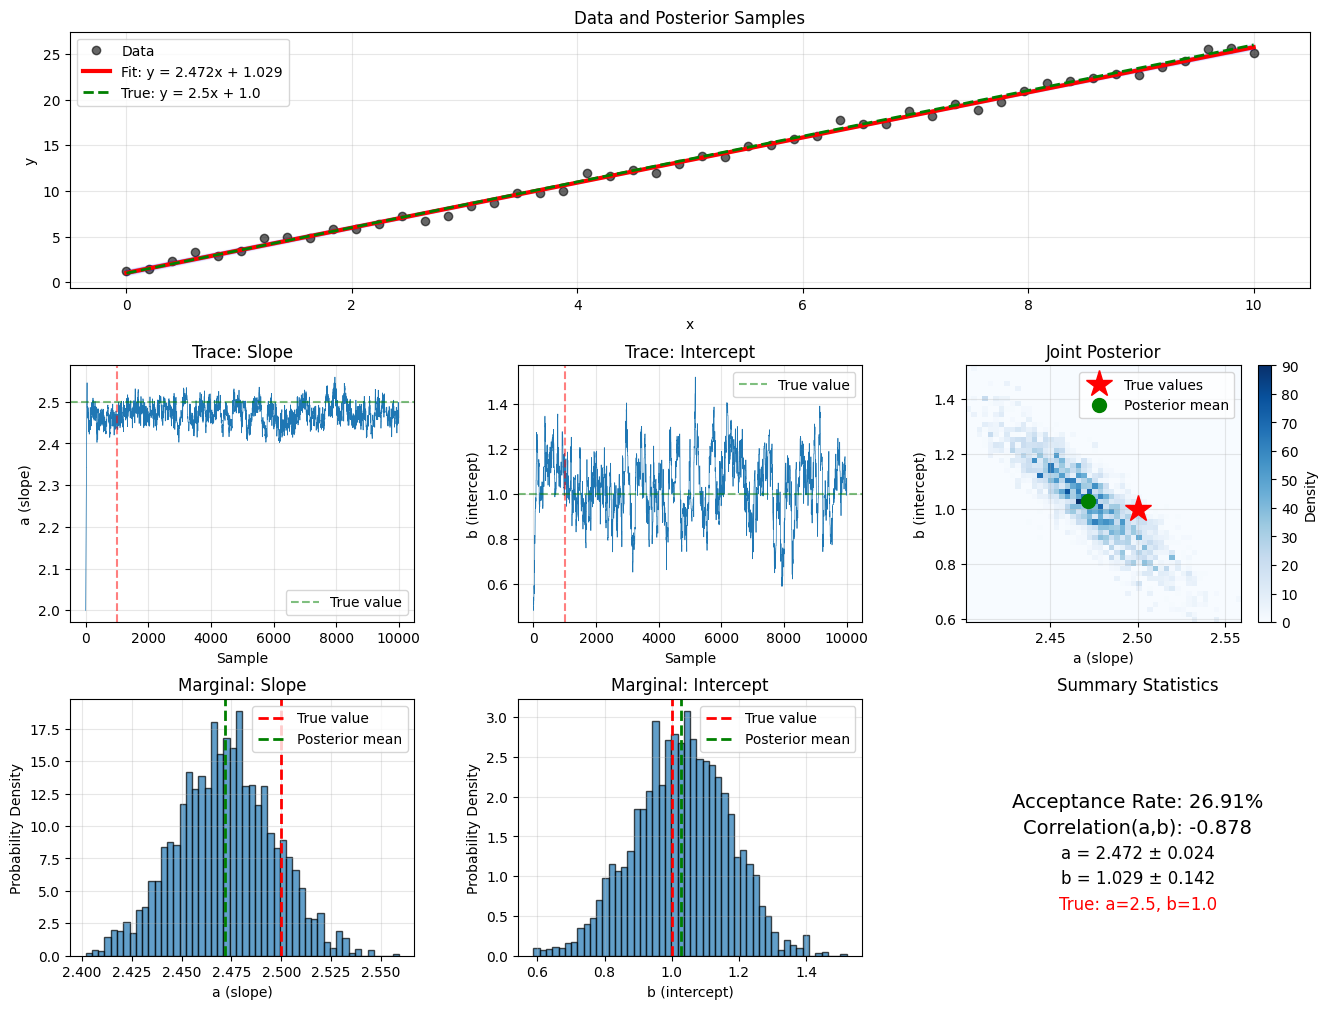


Parameter Estimates:
Slope (a): 2.4718 ± 0.0244 (True: 2.5)
Intercept (b): 1.0286 ± 0.1416 (True: 1.0)
Correlation: -0.8777


In [17]:
# Generate synthetic data: y = a*x + b + noise
np.random.seed(42)
true_a = 2.5
true_b = 1.0
noise_std = 0.5

x_data = np.linspace(0, 10, 50)
y_data = true_a * x_data + true_b + np.random.normal(0, noise_std, len(x_data))

# Define log-likelihood and log-prior
def log_likelihood(params, x, y, sigma):
    a, b = params
    y_model = a * x + b
    return -0.5 * np.sum(((y - y_model) / sigma)**2)

def log_prior(params):
    a, b = params
    # Uniform priors: a in [0, 5], b in [-2, 4]
    if 0 < a < 5 and -2 < b < 4:
        return 0.0
    return -np.inf

def log_posterior(params, x, y, sigma):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x, y, sigma)

# MCMC sampler for 2D parameter space
def mcmc_2d(log_prob_func, initial, n_samples, proposal_std=0.1):
    n_params = len(initial)
    samples = np.zeros((n_samples, n_params))
    samples[0] = initial
    
    current = initial
    current_log_prob = log_prob_func(current)
    
    n_accepted = 0
    
    for i in range(1, n_samples):
        # Propose new state
        proposed = current + np.random.normal(0, proposal_std, n_params)
        proposed_log_prob = log_prob_func(proposed)
        
        # Acceptance probability (in log space)
        log_acceptance = proposed_log_prob - current_log_prob
        
        # Accept or reject
        if np.log(np.random.random()) < log_acceptance:
            current = proposed
            current_log_prob = proposed_log_prob
            n_accepted += 1
        
        samples[i] = current
    
    return samples, n_accepted / n_samples

# Run MCMC
n_samples = 10000
initial = np.array([2.0, 0.5])
samples, acceptance_rate = mcmc_2d(
    lambda params: log_posterior(params, x_data, y_data, noise_std),
    initial, n_samples, proposal_std=0.05
)

# Discard burn-in
burn_in = 1000
samples_burned = samples[burn_in:]

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Data and fit
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(x_data, y_data, 'ko', markersize=6, alpha=0.6, label='Data')

# Plot samples from posterior
for i in np.random.choice(len(samples_burned), 100):
    a_sample, b_sample = samples_burned[i]
    ax1.plot(x_data, a_sample * x_data + b_sample, 'b-', alpha=0.02, linewidth=1)

# Best fit (posterior mean)
a_mean = np.mean(samples_burned[:, 0])
b_mean = np.mean(samples_burned[:, 1])
ax1.plot(x_data, a_mean * x_data + b_mean, 'r-', linewidth=3, 
         label=f'Fit: y = {a_mean:.3f}x + {b_mean:.3f}')
ax1.plot(x_data, true_a * x_data + true_b, 'g--', linewidth=2, 
         label=f'True: y = {true_a}x + {true_b}')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Data and Posterior Samples')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Trace plots
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(samples[:, 0], linewidth=0.5)
ax2.axvline(x=burn_in, color='r', linestyle='--', alpha=0.5)
ax2.axhline(y=true_a, color='g', linestyle='--', alpha=0.5, label='True value')
ax2.set_xlabel('Sample')
ax2.set_ylabel('a (slope)')
ax2.set_title('Trace: Slope')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(samples[:, 1], linewidth=0.5)
ax3.axvline(x=burn_in, color='r', linestyle='--', alpha=0.5)
ax3.axhline(y=true_b, color='g', linestyle='--', alpha=0.5, label='True value')
ax3.set_xlabel('Sample')
ax3.set_ylabel('b (intercept)')
ax3.set_title('Trace: Intercept')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 2D histogram (joint posterior)
ax4 = fig.add_subplot(gs[1, 2])
h = ax4.hist2d(samples_burned[:, 0], samples_burned[:, 1], bins=50, cmap='Blues')
ax4.plot(true_a, true_b, 'r*', markersize=20, label='True values')
ax4.plot(a_mean, b_mean, 'go', markersize=10, label='Posterior mean')
ax4.set_xlabel('a (slope)')
ax4.set_ylabel('b (intercept)')
ax4.set_title('Joint Posterior')
ax4.legend()
plt.colorbar(h[3], ax=ax4, label='Density')

# Marginal distributions
ax5 = fig.add_subplot(gs[2, 0])
ax5.hist(samples_burned[:, 0], bins=50, density=True, alpha=0.7, edgecolor='black')
ax5.axvline(x=true_a, color='r', linestyle='--', linewidth=2, label='True value')
ax5.axvline(x=a_mean, color='g', linestyle='--', linewidth=2, label='Posterior mean')
ax5.set_xlabel('a (slope)')
ax5.set_ylabel('Probability Density')
ax5.set_title('Marginal: Slope')
ax5.legend()
ax5.grid(True, alpha=0.3)

ax6 = fig.add_subplot(gs[2, 1])
ax6.hist(samples_burned[:, 1], bins=50, density=True, alpha=0.7, edgecolor='black')
ax6.axvline(x=true_b, color='r', linestyle='--', linewidth=2, label='True value')
ax6.axvline(x=b_mean, color='g', linestyle='--', linewidth=2, label='Posterior mean')
ax6.set_xlabel('b (intercept)')
ax6.set_ylabel('Probability Density')
ax6.set_title('Marginal: Intercept')
ax6.legend()
ax6.grid(True, alpha=0.3)

# Correlation
ax7 = fig.add_subplot(gs[2, 2])
correlation = np.corrcoef(samples_burned.T)[0, 1]
ax7.text(0.5, 0.6, f'Acceptance Rate: {acceptance_rate:.2%}', 
         ha='center', va='center', fontsize=14, transform=ax7.transAxes)
ax7.text(0.5, 0.5, f'Correlation(a,b): {correlation:.3f}', 
         ha='center', va='center', fontsize=14, transform=ax7.transAxes)
ax7.text(0.5, 0.4, f'a = {a_mean:.3f} ± {np.std(samples_burned[:, 0]):.3f}', 
         ha='center', va='center', fontsize=12, transform=ax7.transAxes)
ax7.text(0.5, 0.3, f'b = {b_mean:.3f} ± {np.std(samples_burned[:, 1]):.3f}', 
         ha='center', va='center', fontsize=12, transform=ax7.transAxes)
ax7.text(0.5, 0.2, f'True: a={true_a}, b={true_b}', 
         ha='center', va='center', fontsize=12, transform=ax7.transAxes, color='red')
ax7.set_xlim(0, 1)
ax7.set_ylim(0, 1)
ax7.axis('off')
ax7.set_title('Summary Statistics')

plt.show()

print("\nParameter Estimates:")
print(f"Slope (a): {a_mean:.4f} ± {np.std(samples_burned[:, 0]):.4f} (True: {true_a})")
print(f"Intercept (b): {b_mean:.4f} ± {np.std(samples_burned[:, 1]):.4f} (True: {true_b})")
print(f"Correlation: {correlation:.4f}")

Note this methodology can be extended to fits of much more complex data. This admittedly is 'overkill' for 1D, but the strengths of MCMC lie in multidimensional cases where other methods fail. 

### Activity 4: The Ising Model

The Ising model is a mathematical model of ferromagnetism in statistical mechanics. It's one of the most studied models in computational physics.

The model consists of discrete variables that represent magnetic dipole moments of atomic "spins" that can be in one of two states (+1 or −1). The spins are arranged on a lattice, allowing each spin to interact with its neighbors. Neighboring spins that agree have a lower energy than those that disagree; the system tends to the lowest energy but heat disturbs this tendency, thus creating the possibility of different structural phases.

The suite of functions below will be used to make an simulation of the Ising model. You can read more about the specific mathematics behind the model here: https://en.wikipedia.org/wiki/Ising_model

In [18]:
class IsingModel:
    def __init__(self, size, temperature):
        """
        Initialize Ising model on a square lattice
        
        Parameters:
        -----------
        size : int
            Size of the lattice (size x size)
        temperature : float
            Temperature in units of J/k_B (J = coupling constant)
        """
        self.size = size
        self.T = temperature
        self.lattice = np.random.choice([-1, 1], size=(size, size))
        
    def energy(self):
        """Calculate total energy of the system"""
        E = 0
        for i in range(self.size):
            for j in range(self.size):
                S = self.lattice[i, j]
                # Sum over nearest neighbors with periodic boundary conditions
                neighbors = self.lattice[(i+1) % self.size, j] + \
                           self.lattice[i, (j+1) % self.size] + \
                           self.lattice[(i-1) % self.size, j] + \
                           self.lattice[i, (j-1) % self.size]
                E += -S * neighbors
        return E / 2.0  # Divide by 2 to avoid double counting
    
    def magnetization(self):
        """Calculate total magnetization"""
        return np.sum(self.lattice)
    
    def monte_carlo_step(self):
        """Perform one Monte Carlo step (one sweep through the lattice)"""
        for _ in range(self.size**2):
            # Pick random spin
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)
            S = self.lattice[i, j]
            
            # Calculate energy change if we flip this spin
            neighbors = self.lattice[(i+1) % self.size, j] + \
                       self.lattice[i, (j+1) % self.size] + \
                       self.lattice[(i-1) % self.size, j] + \
                       self.lattice[i, (j-1) % self.size]
            
            dE = 2 * S * neighbors
            
            # Metropolis algorithm
            if dE < 0 or np.random.random() < np.exp(-dE / self.T):
                self.lattice[i, j] = -S
    
    def simulate(self, n_steps, measure_interval=1):
        """Run Monte Carlo simulation"""
        energies = []
        magnetizations = []
        
        for step in range(n_steps):
            self.monte_carlo_step()
            
            if step % measure_interval == 0:
                energies.append(self.energy())
                magnetizations.append(abs(self.magnetization()))
        
        return energies, magnetizations

Let's start by visualizing the ising model results at different temperatures to look at magnetic domain structure

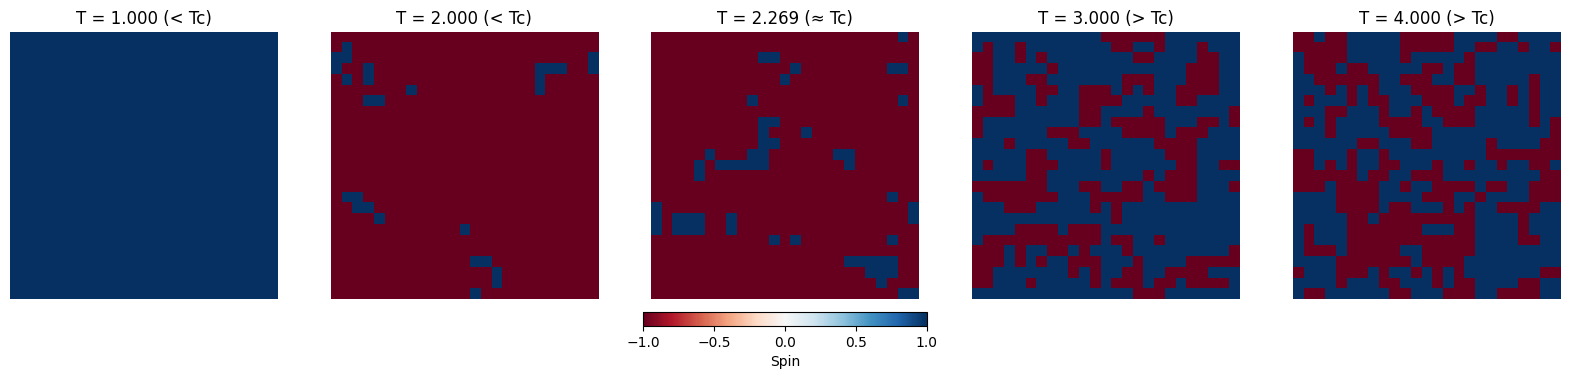

Note: Tc ≈ 2.269 is the critical temperature for the 2D Ising model
Below Tc: Ordered (ferromagnetic) phase
Above Tc: Disordered (paramagnetic) phase


In [19]:
size = 25 #size of grid to consider
n_equilibration = 1000 # steps to reach equilibrium in sim. 
temperatures = [1.0, 2.0, 2.269, 3.0, 4.0]  # T_c ≈ 2.269 for 2D Ising model

fig, axes = plt.subplots(1, len(temperatures), figsize=(20, 4))

for idx, T in enumerate(temperatures):
    model = IsingModel(size, T)
    
    # Equilibrate
    for _ in range(n_equilibration):
        model.monte_carlo_step()
    
    # Plot
    im = axes[idx].imshow(model.lattice, cmap='RdBu', vmin=-1, vmax=1)
    axes[idx].set_title(f'T = {T:.3f}' + (' (< Tc)' if T < 2.269 else ' (> Tc)' if T > 2.269 else ' (≈ Tc)'))
    axes[idx].axis('off')

plt.colorbar(im, ax=axes, orientation='horizontal', fraction=0.046, pad=0.04, label='Spin')
#plt.tight_layout()
plt.show()

print("Note: Tc ≈ 2.269 is the critical temperature for the 2D Ising model")
print("Below Tc: Ordered (ferromagnetic) phase")
print("Above Tc: Disordered (paramagnetic) phase")

Next, let's examine time evolution of the simulation and related thermodynamic properties

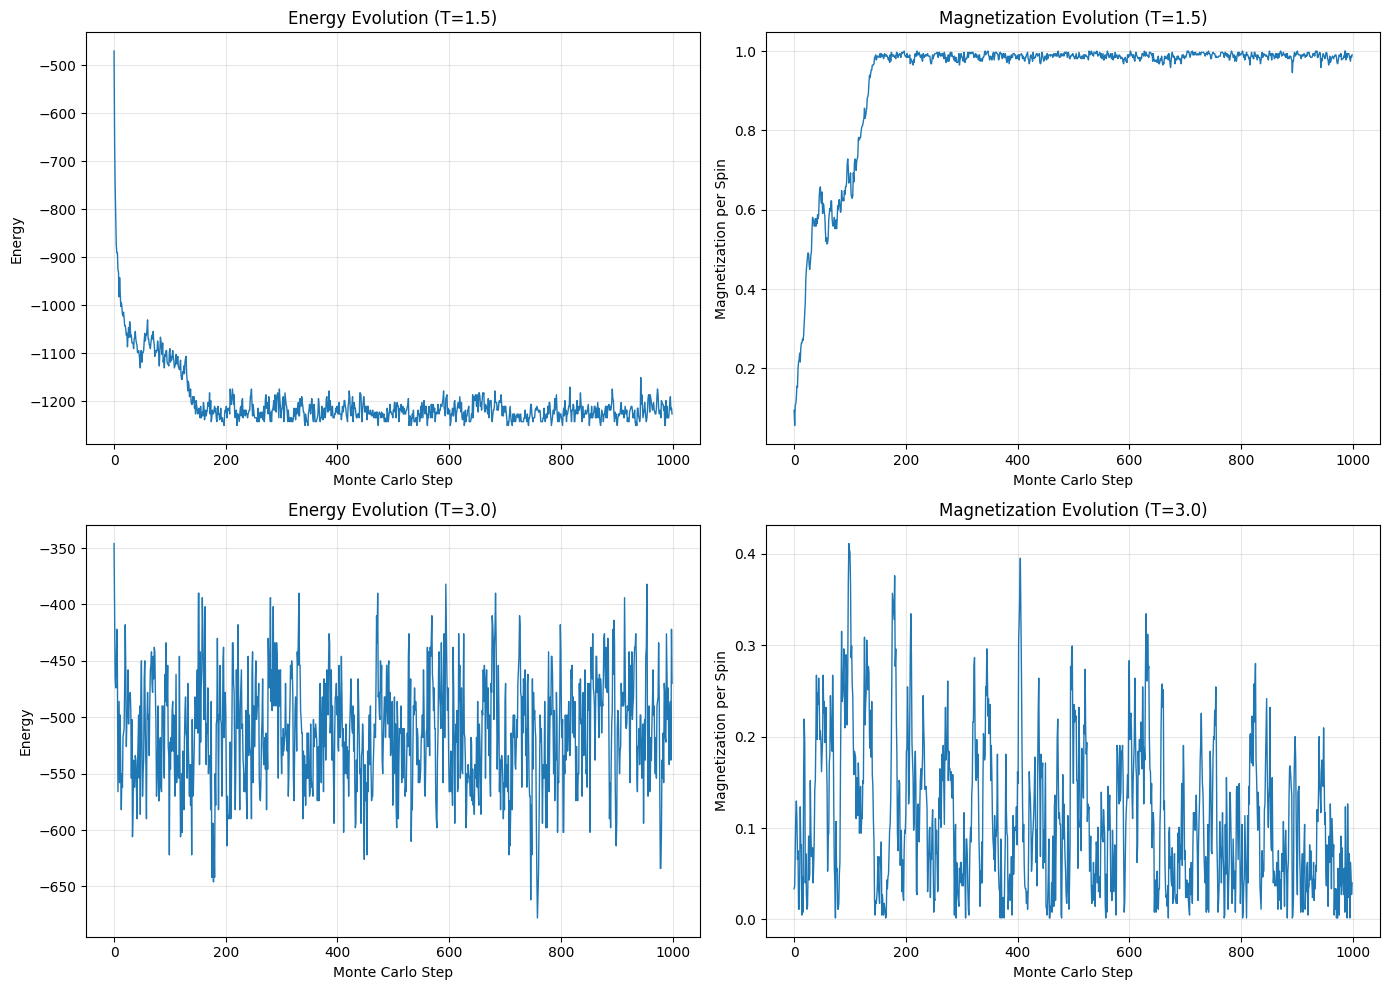

In [20]:
#model parameters. Select range of temperatures near the critical temperature
size = 25
T_low = 1.5
T_high = 3.0
n_steps = 1000

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Low temperature
model_low = IsingModel(size, T_low)
energies_low, mags_low = model_low.simulate(n_steps)

axes[0, 0].plot(energies_low, linewidth=1)
axes[0, 0].set_xlabel('Monte Carlo Step')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].set_title(f'Energy Evolution (T={T_low})')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(np.array(mags_low) / size**2, linewidth=1)
axes[0, 1].set_xlabel('Monte Carlo Step')
axes[0, 1].set_ylabel('Magnetization per Spin')
axes[0, 1].set_title(f'Magnetization Evolution (T={T_low})')
axes[0, 1].grid(True, alpha=0.3)

# High temperature
model_high = IsingModel(size, T_high)
energies_high, mags_high = model_high.simulate(n_steps)

axes[1, 0].plot(energies_high, linewidth=1)
axes[1, 0].set_xlabel('Monte Carlo Step')
axes[1, 0].set_ylabel('Energy')
axes[1, 0].set_title(f'Energy Evolution (T={T_high})')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(np.array(mags_high) / size**2, linewidth=1)
axes[1, 1].set_xlabel('Monte Carlo Step')
axes[1, 1].set_ylabel('Magnetization per Spin')
axes[1, 1].set_title(f'Magnetization Evolution (T={T_high})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Finally, let's take a look at the 'phase transition' of the magnetic state (Note this cell is very slow and may take a while to run!)

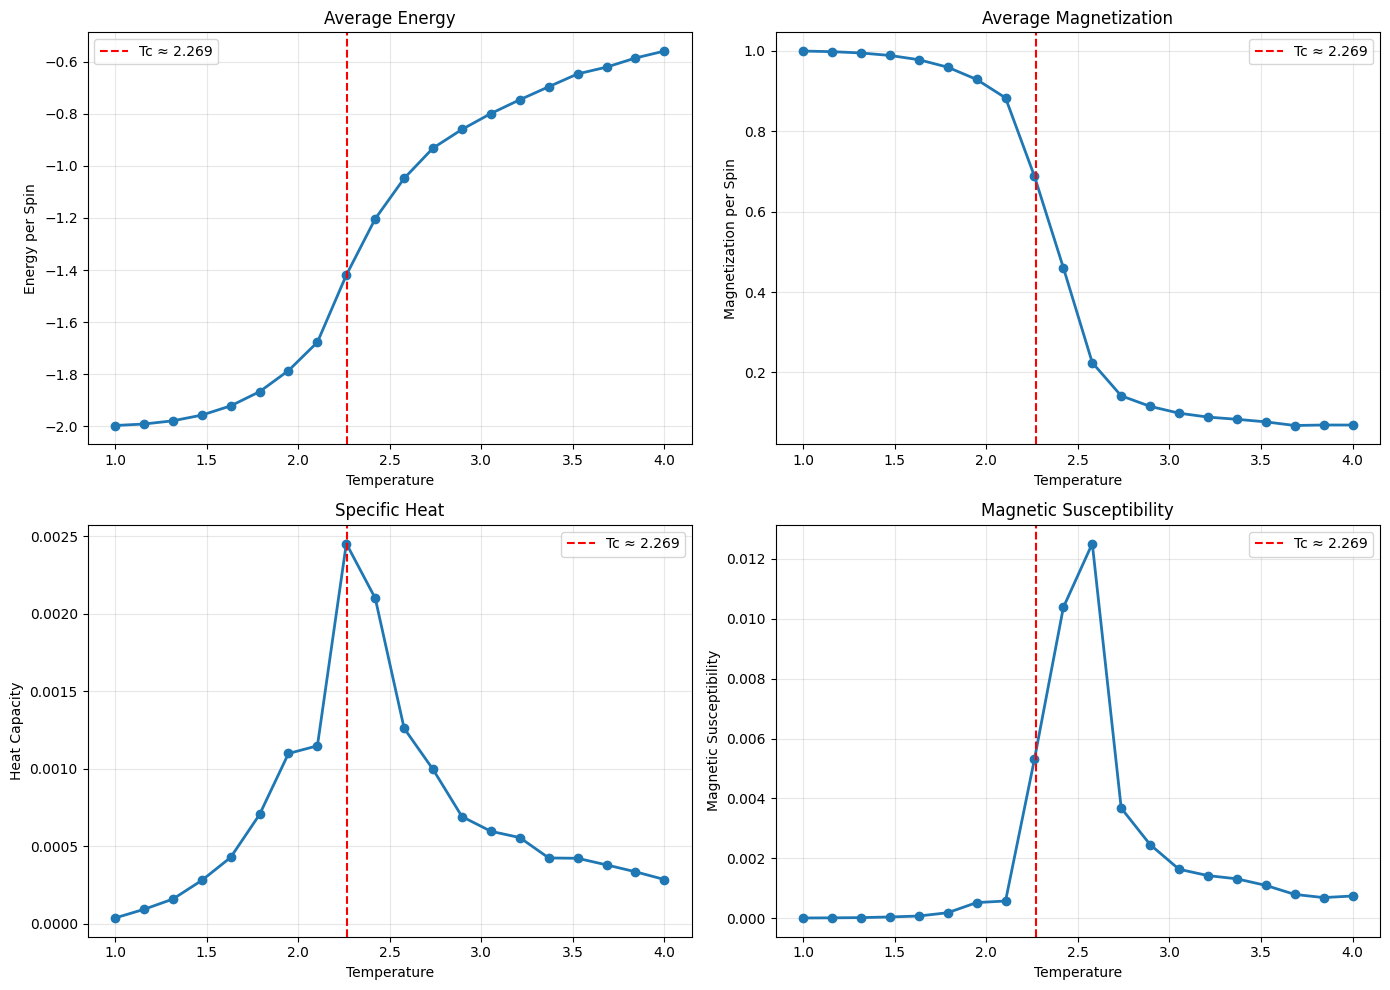

Phase transition is visible in:
1. Magnetization: Drops sharply near Tc
2. Heat capacity: Peaks at Tc
3. Susceptibility: Peaks at Tc


In [21]:
size = 25
temperatures = np.linspace(1.0, 4.0, 20)
n_equilibration = 1000
n_measurement = 500

mean_energies = []
mean_magnetizations = []
heat_capacities = []
susceptibilities = []

for T in temperatures:
    model = IsingModel(size, T)
    
    # Equilibration
    for _ in range(n_equilibration):
        model.monte_carlo_step()
    
    # Measurement
    energies = []
    magnetizations = []
    
    for _ in range(n_measurement):
        model.monte_carlo_step()
        energies.append(model.energy())
        magnetizations.append(abs(model.magnetization()))
    
    # Calculate thermodynamic quantities
    E = np.array(energies) / size**2
    M = np.array(magnetizations) / size**2
    
    mean_energies.append(np.mean(E))
    mean_magnetizations.append(np.mean(M))
    
    # Heat capacity: C = (⟨E²⟩ - ⟨E⟩²) / T²
    heat_capacities.append((np.mean(E**2) - np.mean(E)**2) / T**2)
    
    # Magnetic susceptibility: χ = (⟨M²⟩ - ⟨M⟩²) / T
    susceptibilities.append((np.mean(M**2) - np.mean(M)**2) / T)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(temperatures, mean_energies, 'o-', linewidth=2)
axes[0, 0].axvline(x=2.269, color='r', linestyle='--', label='Tc ≈ 2.269')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Energy per Spin')
axes[0, 0].set_title('Average Energy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(temperatures, mean_magnetizations, 'o-', linewidth=2)
axes[0, 1].axvline(x=2.269, color='r', linestyle='--', label='Tc ≈ 2.269')
axes[0, 1].set_xlabel('Temperature')
axes[0, 1].set_ylabel('Magnetization per Spin')
axes[0, 1].set_title('Average Magnetization')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(temperatures, heat_capacities, 'o-', linewidth=2)
axes[1, 0].axvline(x=2.269, color='r', linestyle='--', label='Tc ≈ 2.269')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Heat Capacity')
axes[1, 0].set_title('Specific Heat')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(temperatures, susceptibilities, 'o-', linewidth=2)
axes[1, 1].axvline(x=2.269, color='r', linestyle='--', label='Tc ≈ 2.269')
axes[1, 1].set_xlabel('Temperature')
axes[1, 1].set_ylabel('Magnetic Susceptibility')
axes[1, 1].set_title('Magnetic Susceptibility')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Phase transition is visible in:")
print("1. Magnetization: Drops sharply near Tc")
print("2. Heat capacity: Peaks at Tc")
print("3. Susceptibility: Peaks at Tc")